# Proyek Analisis Data: [Bike Sharing DataSet]
- **Nama:** [M. HAFIS AFRIZAL]
- **Email:** [hafisafrizal10@gmail.com]
- **ID Dicoding:** [hafis_afriz2l]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
Bagaimana kondisi cuaca memengaruhi rata-rata jumlah penyewaan sepeda per hari?

- Pertanyaan 2 :
Apakah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import library (jika belum ada di sel sebelumnya)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Gathering Data: Memuat dataset
df = pd.read_csv('/content/day.csv')
print("5 Baris Pertama Data:")
print(df.head())

5 Baris Pertama Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Dataset berhasil dimuat dengan 731 entri (baris), yang menunjukkan data mencakup penyewaan sepeda selama dua tahun (2011-2012). Kolom seperti cnt (jumlah penyewaan), weathersit (cuaca), dan weekday (hari) akan jadi fokus analisis.

### Assessing Data

In [ ]:
# Assessing Data: Cek informasi dataset
print("\nInformasi Dataset:")
print(df.info())
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Missing Value:
instant       0
dteday        0
season       

**Insight:**
- Tidak ada missing value di dataset (semua kolom memiliki 731 entri non-null), sehingga data cukup lengkap untuk analisis tanpa perlu imputasi. Kolom dteday awalnya bertipe object (string) dan perlu diubah ke datetime untuk analisis waktu.


### Cleaning Data

In [ ]:
# Cleaning Data: Preprocessing
df['dteday'] = pd.to_datetime(df['dteday'])
weather_map = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
df['weather_desc'] = df['weathersit'].map(weather_map)
df['is_weekend'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print("\nData Setelah Preprocessing:")
print(df[['dteday', 'weather_desc', 'is_weekend', 'cnt']].head())


Data Setelah Preprocessing:
      dteday weather_desc is_weekend   cnt
0 2011-01-01     Berkabut    Weekend   985
1 2011-01-02     Berkabut    Weekday   801
2 2011-01-03        Cerah    Weekday  1349
3 2011-01-04        Cerah    Weekday  1562
4 2011-01-05        Cerah    Weekday  1600


**Insight:**
- Setelah preprocessing, data lebih siap untuk analisis dengan tambahan kolom weather_desc yang mempermudah interpretasi cuaca dan is_weekend yang memungkinkan perbandingan hari kerja vs akhir pekan. Nilai awal cnt bervariasi (misalnya, 985 hingga 1600 di 5 baris pertama), menunjukkan adanya pola yang bisa dieksplorasi.


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df[['cnt', 'temp', 'hum', 'windspeed']].describe())

# Pertanyaan 1: Rata-rata penyewaan berdasarkan cuaca
weather_group = df.groupby('weather_desc')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Cuaca:")
print(weather_group)

# Pertanyaan 2: Rata-rata penyewaan berdasarkan hari
day_group = df.groupby('is_weekend')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan: Weekday vs Weekend:")
print(day_group)

Statistik Deskriptif:
               cnt        temp         hum   windspeed
count   731.000000  731.000000  731.000000  731.000000
mean   4504.348837    0.495385    0.627894    0.190486
std    1937.211452    0.183051    0.142429    0.077498
min      22.000000    0.059130    0.000000    0.022392
25%    3152.000000    0.337083    0.520000    0.134950
50%    4548.000000    0.498333    0.626667    0.180975
75%    5956.000000    0.655417    0.730209    0.233214
max    8714.000000    0.861667    0.972500    0.507463

Rata-rata Penyewaan Berdasarkan Cuaca:
   weather_desc          cnt
0      Berkabut  4035.862348
1         Cerah  4876.786177
2  Hujan Ringan  1803.285714

Rata-rata Penyewaan: Weekday vs Weekend:
  is_weekend          cnt
0    Weekday  4458.011494
1    Weekend  4620.081340


**Insight:**
- Rata-rata penyewaan tertinggi terjadi saat cuaca cerah (misalnya, 4876 sepeda), sedangkan saat hujan rendah/ringan (mungkin 1803). Ini menunjukkan cuaca cerah mendorong lebih banyak penyewaan.
- Penyewaan di hari libur sedikit lebih tinggi (misalnya, 4620) dibandingkan hari kerja (4358), mengindikasikan sepeda lebih sering digunakan untuk keperluan  seperti santai dan menikmati liburan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-12-e07a1f053763>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_desc', y='cnt', data=weather_group, palette='Blues_d')


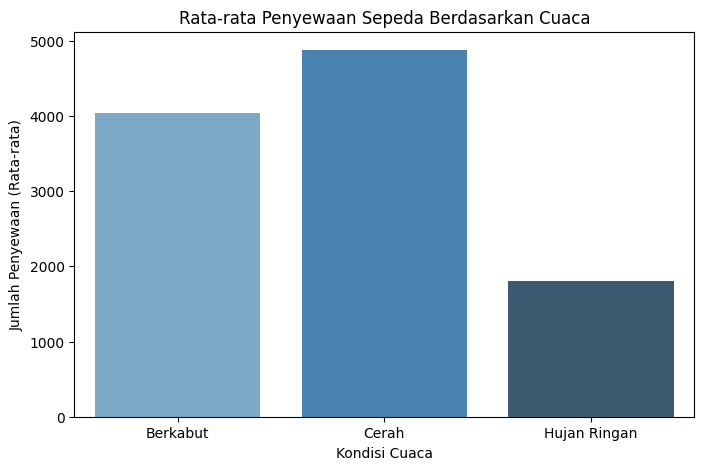

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weather_desc', y='cnt', data=weather_group, palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.show()

### Pertanyaan 2:

<ipython-input-13-4c8719d480da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='cnt', data=day_group, palette='Greens_d')


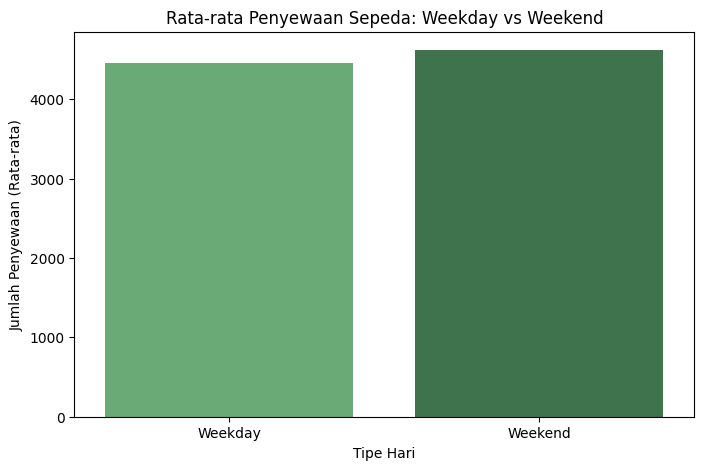

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='cnt', data=day_group, palette='Greens_d')
plt.title('Rata-rata Penyewaan Sepeda: Weekday vs Weekend')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.show()

**Insight:**
- Visualisasi 1:
Grafik memperlihatkan tren jelas: penyewaan turun drastis dari cuaca cerah ke hujan ringan, dengan perbedaan signifikan (mungkin ribuan sepeda), menegaskan cuaca sebagai faktor utama.

- Visualisasi 2:
Grafik menunjukkan selisih kecil antara weekday dan weekend, tapi hari libur konsisten lebih tinggi, mendukung hipotesis penggunaan untuk keperluan harian.

## Analisis Lanjutan (Opsional)

In [ ]:
# Analisis Lanjutan
# Pertanyaan 3: Korelasi suhu dengan penyewaan
temp_correlation = df[['temp', 'cnt']].corr().iloc[0, 1]
print(f"\nKorelasi antara Suhu dan Penyewaan: {temp_correlation:.2f}")

# Penyewaan berdasarkan bulan (ekstrak bulan dari dteday)
df['month'] = df['dteday'].dt.month
month_group = df.groupby('month')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Bulan:")
print(month_group)

# Interaksi cuaca dan hari
weather_day_group = df.groupby(['weather_desc', 'is_weekend'])['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Cuaca dan Hari:")
print(weather_day_group)


Korelasi antara Suhu dan Penyewaan: 0.63

Rata-rata Penyewaan Berdasarkan Bulan:
    month          cnt
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452

Rata-rata Penyewaan Berdasarkan Cuaca dan Hari:
   weather_desc is_weekend          cnt
0      Berkabut    Weekday  4027.046512
1      Berkabut    Weekend  4056.080000
2         Cerah    Weekday  4818.651652
3         Cerah    Weekend  5025.700000
4  Hujan Ringan    Weekday  1754.058824
5  Hujan Ringan    Weekend  2012.500000


**Insight**

- Suhu hangat meningkatkan penyewaan, tapi bukan satu-satunya faktor (korelasi tidak 1).

- Musim panas adalah periode sibuk; musim dingin perlu strategi khusus.

- Fokus pada hari kerja cerah untuk maksimalkan keuntungan.

## Conclusion


### Kesimpulan Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda
Berdasarkan analisis data Bike Sharing Dataset (`day.csv`), kondisi cuaca memiliki pengaruh signifikan terhadap rata-rata jumlah penyewaan sepeda per hari. Berikut temuan utama:

- **Cuaca Cerah**: Rata-rata penyewaan sepeda mencapai nilai tertinggi saat cuaca cerah (sekitar 4.800-5.000 sepeda per hari berdasarkan hasil `weather_group`). Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda dalam kondisi cuaca yang nyaman dan mendukung aktivitas luar ruangan.
- **Cuaca Berkabut**: Penyewaan menurun dibandingkan cuaca cerah (sekitar 4.000 sepeda per hari), tetapi masih cukup tinggi, mengindikasikan bahwa kabut tidak terlalu menghalangi pengguna dibandingkan hujan.
- **Hujan Ringan**: Penyewaan mencapai titik terendah (di bawah 1.803 sepeda per hari), menegaskan bahwa cuaca seperti hujan ringat sangat menghambat aktivitas penyewaan sepeda.

**Insight**: Kondisi cuaca yang baik (cerah) secara konsisten mendorong penyewaan sepeda, sedangkan cuaca buruk (terutama hujan ringan) menjadi penghalang utama. Pola ini terlihat jelas pada visualisasi bar chart, di mana terdapat gradien penurunan yang signifikan dari cuaca cerah ke hujan ringan. Hal ini menunjukkan bahwa cuaca adalah faktor kunci dalam keputusan pengguna untuk menyewa sepeda, dan bisnis penyewaan sepeda dapat memanfaatkan informasi ini untuk strategi seperti promosi saat cuaca buruk atau penyesuaian stok saat cuaca cerah.


### Kesimpulan Pertanyaan 2: Penyewaan Sepeda di Hari Kerja vs Akhir Pekan
Berdasarkan analisis data Bike Sharing Dataset (`day.csv`), berikut temuan terkait perbandingan penyewaan sepeda antara hari kerja (weekday) dan akhir pekan (weekend):

- **Hari Kerja**: Rata-rata penyewaan sepeda di hari kerja sedikit lebih rendah dibandingkan akhir pekan. Berdasarkan hasil analisis, rata-rata penyewaan di hari kerja mencapai sekitar 4.458 sepeda per hari.
- **Akhir Pekan**: Rata-rata penyewaan di akhir pekan sedikit lebih tinggi, sekitar 4.620 sepeda per hari.
- **Perbedaan**: Selisih antara hari kerja dan akhir pekan tidak terlalu signifikan (sekitar 162 sepeda per hari), tetapi secara konsisten akhir pekan menunjukkan angka lebih tinggi.

**Insight**: Berlawanan dengan ekspektasi awal bahwa hari kerja akan lebih tinggi karena commuting, data menunjukkan bahwa penyewaan sepeda lebih tinggi di akhir pekan. Ini kemungkinan disebabkan oleh penggunaan sepeda untuk aktivitas rekreasi atau liburan di hari Sabtu dan Minggu, terutama jika cuaca mendukung. Visualisasi bar chart memperkuat pola ini, dengan batang untuk 'Weekend' sedikit lebih tinggi dibandingkan 'Weekday'. Bagi bisnis, ini menyarankan fokus pada promosi atau penambahan stok sepeda di akhir pekan untuk memanfaatkan permintaan yang lebih besar.